# Burada öğrenmeye ilk başladığım denemeler bulunuyor

# Day 1: Introduction to Data Science, Internal Data Acquisition and Exploratory Data Analysis

# <font color="blue">Table of Contents</font>

## Introduction to Data Science
* Relationship and differences between DS, AI, ML, DL
* CRISP-DM
* Business Applications

## Internal Data Acquisition
* Introduction to Pandas
* Importing & Exporting: CSV, Excel, SQL, etc.

## Exploratory Data Analysis
* Pandas: Filter, Groupby, Aggregations, Pivot table, 
* Numpy
* Datetime

### 2.1 Pandas
* Primary objects in Pandas are DataFrames
* DataFrames are like tables
    * Contain rows and columns of data
    * Columns have names
    * Rows have index values
* Pandas has easy functions for importing and exporting data
    * CSV files
    * Excel spreadsheets
    * SQL queries
    * XML and others

#### 2.1.1 Framework

### <font color="green">Q: How do you create a DataFrame in Pandas?</font>

In [2]:
import pandas as pd 

In [3]:
df_empty = pd.DataFrame()
df_empty

""


In [4]:
df = pd.DataFrame({'name':['Bob', 'Jen', 'Tim'],
                  'age':[20, 30, 40],
                  'pet':['cat', 'dog', 'bird']})
df

,name,age,pet
0,Bob,20,cat
1,Jen,30,dog
2,Tim,40,bird


In [5]:
print(df.columns)

Index(['name', 'age', 'pet'], dtype='object')


In [6]:
print(df.index)

RangeIndex(start=0, stop=3, step=1)


In [7]:
df["age"]=df["age"][0]+10

In [8]:
df

,name,age,pet
0,Bob,30,cat
1,Jen,30,dog
2,Tim,30,bird


#### 2.1.2 Indexing

### <font color="green">Q: What are the two ways you can grab a column in Pandas?</font>

In [9]:
 # 'First name'

In [10]:
df.name

0    Bob
1    Jen
2    Tim
Name: name, dtype: object

In [11]:
df["name"]

0    Bob
1    Jen
2    Tim
Name: name, dtype: object

In [12]:
df[["name","pet"]]

,name,pet
0,Bob,cat
1,Jen,dog
2,Tim,bird


In [13]:
df

,name,age,pet
0,Bob,30,cat
1,Jen,30,dog
2,Tim,30,bird


### <font color="green">Q: What are the main ways we can index a DataFrame?</font>

In [14]:
df

,name,age,pet
0,Bob,30,cat
1,Jen,30,dog
2,Tim,30,bird


In [15]:
df.sort_values("pet",inplace=True) 
# verileri sayısal ise sıraya göre yazı ise 
# alfabeye göre sıralarız

In [16]:
df

,name,age,pet
2,Tim,30,bird
0,Bob,30,cat
1,Jen,30,dog


In [17]:
data=pd.read_csv("test_pandas.csv")
data

,0,1,cat,1.1
0,1,2,dog,2.2
1,2,3,bird,3.3


In [18]:
data.to_csv("test")

#### 2.2.1 CSV

In [19]:
data=pd.read_csv("test_pandas.csv")
data

,0,1,cat,1.1
0,1,2,dog,2.2
1,2,3,bird,3.3


In [20]:
data.to_csv("test_pandas_no_header.csv",header=False,index=True)

In [21]:
data

,0,1,cat,1.1
0,1,2,dog,2.2
1,2,3,bird,3.3


#### 2.2.2 Excel

In [22]:
data=pd.read_excel("test_pandas.xlsm","Sheet1")
data

,Column A,Column B,Column C
0,1,cat,1.1
1,2,dog,2.2
2,3,bird,3.3


In [23]:
writer=pd.ExcelWriter("test_sheets.xlsx")
data.to_excel(writer,"Original")
data.to_excel(writer,"copy")
writer.save() #elde ettiğimiz verileri excel formatına koymak

#### 2.2.3 SQL

In [31]:
import pandas as pd
import sqlite3
conn=sqlite3.connect('test_pandas.db')


In [32]:
tables = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")



In [33]:
new_data = pd.DataFrame({'id':[6,7],
                        'city':['LA', 'ANA'],
                        'mascot':['Rams', 'Chargers']})
new_data

,id,city,mascot
0,6,LA,Rams
1,7,ANA,Chargers


In [29]:
new_data.to_sql("newtest",conn)

ValueError: Table 'newtest' already exists.

# <font color="red">III. Exploratory Data Analysis </font>

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.
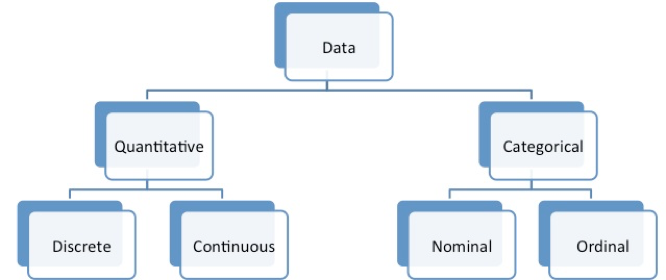

Today we will explore the Titanic data:

### 3.1 Explore Titanic Data

#### Load and Investigate the file

In [34]:
df=pd.read_csv("train.csv")

In [44]:
round(df.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,714.0,891.0,891.0,891.0
mean,446.0,0.0,2.0,30.0,1.0,0.0,32.0
std,257.0,0.0,1.0,15.0,1.0,1.0,50.0
min,1.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,224.0,0.0,2.0,20.0,0.0,0.0,8.0
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.0
75%,668.0,1.0,3.0,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.0


In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df.sample(2) # verinin içinden rastegele bir satır gelir

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C
761,762,0,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,NaN,S


#### Analyze the data

In [46]:
df.isnull().sum()
#boş veriyi gösterir

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
df.info() #toplam satır sütun sayılarını gösterir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [54]:
round(df["Age"].describe()) 
#sadece bir sütunu görmek istersek

count    714.0
mean      30.0
std       15.0
min        0.0
25%       20.0
50%       28.0
75%       38.0
max       80.0
Name: Age, dtype: float64

In [55]:
round(df.corr()) 
#sütunlar arasındaki ilişkiyi gösterir #round ise sayıları tam sayı yapar

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0
Survived,-0.0,1.0,-0.0,-0.0,-0.0,0.0,0.0
Pclass,-0.0,-0.0,1.0,-0.0,0.0,0.0,-1.0
Age,0.0,-0.0,-0.0,1.0,-0.0,-0.0,0.0
SibSp,-0.0,-0.0,0.0,-0.0,1.0,0.0,0.0
Parch,-0.0,0.0,0.0,-0.0,0.0,1.0,0.0
Fare,0.0,0.0,-1.0,0.0,0.0,0.0,1.0


#### Filter the data

In [57]:
df[df.Sex=="male"]
#veriyi filtreleme

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [58]:
df.Age[df.Sex=="male"] 

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
883    28.0
884    25.0
886    27.0
889    26.0
890    32.0
Name: Age, Length: 577, dtype: float64

In [60]:
df.Survived[(df.Sex=="male") |(df.Age<18)].mean()
# 18 yaşından küçük erkeklerin hayatta kalma ortalamaları

0.23259493670886075

In [61]:
df.Sex.value_counts()
#gemide kaç kadın kaç erkek var

male      577
female    314
Name: Sex, dtype: int64

In [62]:
df.Survived[(df.Sex=="male")&(df.Age>=18)].mean()

0.17721518987341772

#### Groupby

In [63]:
df.groupby("Sex")["Survived"].mean()
#erkeklerin ve kadınların kurtulma ortalaması

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64